## 0. Imports

### 0.1. Libraries

In [1]:
# Data manipulation libraries
import pandas                as pd
import numpy                 as np
import geopandas             as gpd

# Visualization libraries
import seaborn               as sns
import matplotlib            as mpl
import matplotlib.pyplot     as plt

# Other
import warnings
import sys
import os

### 0.2. Settings

In [2]:
# Ignoring warnings
warnings.filterwarnings('ignore')

# Pandas Settings
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)

# Visualization Settings
%matplotlib inline

# Set a style
mpl.style.use('ggplot')  

# Customize rcParams
mpl.rcParams.update({
    'axes.titlesize': 24,
    'axes.labelsize': 16,
    'axes.facecolor': 'white',
    'axes.linewidth': 1,
    'axes.grid': True,
    'xtick.labelsize': 16,
    'xtick.bottom': False,
    'ytick.labelsize': 16,
    'ytick.left': False,
    'legend.fontsize': 16,
    'lines.linewidth': 2,
    'lines.markersize': 6,
    'grid.color': 'lightgray',
    'grid.linestyle': '-',
    'grid.linewidth': 0.5,
    'font.size': 16,
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial'],
    'figure.titlesize': 24,
    'figure.figsize': (16,8),
    'figure.dpi': 150
})

### 0.3. Datasets

In [3]:
# Mapbiomas
df = pd.read_csv('../data/indicators/mapbiomas_cobertura_col8_alb.csv')

In [4]:
# GeoDataFrame
gdf = gpd.read_file('../data/interim/amazonia_legal.geojson')[['cod_ibge', 'geometry']]

### 0.4. Dictionaries

In [5]:
dict_class_id = {
    0: 'Não observado',
    # 1. Floresta
    3: 'Formação Florestal',
    4: 'Formação Savânica',
    5: 'Mangue',
    6: 'Floresta Alagável',
    # 2. Formação Natural não Florestal
    11: 'Campo Alagado e Área Pantanosa',
    12: 'Formação Campestre',
    15: 'Pastagem',
    29: 'Afloramento Rochoso',
    32: 'Apicum',
    # 3. Agropecuária
    9: 'Silvicultura',
    20: 'Cana',
    21: 'Mosaico de Usos',
    35: 'Dendê',
    39: 'Soja',
    40: 'Arroz',
    41: 'Outras Lavouras Temporárias',
    62: 'Algodão',
    # 4. Área não Vegetada
    23: 'Praia, Duna e Areal',
    24: 'Área Urbanizada',
    25: 'Outras Áreas não Vegetadas',
    30: 'Mineração',
    # 5. Corpo D'água
    33: 'Rio, Lago e Oceano'
}

## 1. Data Preparation

In [6]:
df

,geocode,state_acronym,feature_id,biome,class_id,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,1100015,RO,58776,Amazônia,3,450484.599,441683.061,432905.714,421727.719,415320.292,408831.713,405288.129,401999.528,399892.801,399515.773,398915.111,398246.852,397576.780,398215.454,397840.584,395723.955,393172.595,390143.108,386524.613,381626.249,376914.362,371808.972,363346.377
1,1100015,RO,58776,Amazônia,4,18287.253,18135.469,17969.704,17645.440,17313.607,17219.741,17371.211,17330.826,17119.132,17299.911,17407.161,17649.027,17929.625,18046.214,18074.922,18098.535,18076.094,18129.442,18192.191,18301.639,18149.861,17479.215,17245.183
2,1100015,RO,58776,Amazônia,6,1469.582,1454.207,1433.953,1407.502,1398.595,1386.539,1359.482,1333.644,1301.882,1295.943,1293.502,1293.507,1279.892,1275.530,1272.826,1266.102,1262.000,1256.768,1250.221,1235.558,1225.253,1185.364,875.175
3,1100015,RO,58776,Amazônia,11,63184.838,62893.800,62798.586,63824.856,65747.918,66745.577,63906.932,64722.231,63720.699,65222.370,63098.328,63299.080,62673.680,60175.475,59993.441,59219.811,58316.210,57184.780,54729.335,54080.287,52074.296,53881.348,55109.822
4,1100015,RO,58776,Amazônia,12,27194.792,22575.346,19845.421,20468.542,18870.502,18978.560,24586.131,23199.423,24597.491,22901.550,26229.761,25765.606,26187.247,29190.593,28929.129,30427.775,31215.735,32524.642,34829.659,35405.621,39093.220,35638.958,26916.237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10462,5108402,MT,62288,Cerrado,9,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.359,3.445,3.445,3.445,3.963,3.877,17.507,17.507,19.574,19.402
10463,5108402,MT,62288,Cerrado,21,3460.365,3106.044,2745.595,2772.814,2777.071,2831.597,2660.092,2514.341,2327.464,2687.428,2803.646,2658.252,2364.607,1938.107,1435.481,1270.198,1291.297,1393.672,1569.765,1773.043,1801.664,1907.211,2141.243
10464,5108402,MT,62288,Cerrado,24,5484.337,5595.659,5917.918,6002.102,6182.183,6240.000,6351.418,6551.247,6681.871,6801.037,6914.002,7025.078,7216.552,7469.473,7566.508,7721.451,7766.778,7882.071,7944.970,8010.887,8160.900,8172.619,8299.546
10465,5108402,MT,62288,Cerrado,25,1491.198,1488.179,1245.588,1212.164,1234.830,1504.602,1514.957,1591.068,1452.883,1470.215,1754.455,1668.903,1649.284,1588.764,1334.319,1233.606,1220.678,1219.624,1221.955,1300.435,1297.579,1420.697,1602.850


### 1.1. Área Urbanizada

In [7]:
df_area_urbanizada = df[df['class_id'] == 24].reset_index(drop=True)
df_area_urbanizada.drop(columns=['state_acronym', 'feature_id', 'biome', 'class_id'], inplace=True)
df_area_urbanizada = df_area_urbanizada.groupby('geocode').sum().reset_index()
df_area_urbanizada['diff'] = df_area_urbanizada['2022'] - df_area_urbanizada['2010']

In [8]:
df_area_urbanizada

,geocode,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,diff
0,1100015,437.058,438.196,442.747,444.235,454.737,458.237,460.863,466.289,470.402,471.715,473.728,475.478,480.379,484.668,494.207,500.508,506.635,509.260,513.811,516.962,518.187,517.399,518.624,44.896
1,1100023,2280.699,2322.195,2430.386,2508.271,2659.810,2815.403,2869.500,2888.442,2940.602,2952.584,2994.610,3029.497,3093.807,3136.533,3161.375,3186.484,3227.011,3261.372,3333.970,3357.933,3364.541,3367.625,3385.949,391.339
2,1100031,159.979,166.764,170.331,171.201,171.201,171.897,172.071,172.419,172.245,172.680,173.462,175.637,182.335,186.424,187.467,188.250,189.642,189.642,189.642,189.555,189.990,189.903,190.599,17.136
3,1100049,1548.741,1573.903,1587.668,1603.798,1624.664,1635.973,1695.413,1708.564,1734.252,1760.728,1794.482,1875.402,1958.690,2154.808,2198.205,2300.339,2363.284,2398.614,2568.252,2599.199,2652.239,2647.592,2698.178,903.695
4,1100056,765.682,765.682,765.856,765.943,765.856,765.856,765.856,765.943,765.943,765.943,766.117,766.814,766.988,768.121,768.382,768.556,768.817,768.992,773.259,774.217,775.262,775.262,777.440,11.323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,5108600,348.495,351.137,369.367,382.578,437.446,449.159,461.401,471.882,478.927,485.973,489.320,497.598,500.680,506.669,511.425,512.834,516.532,523.842,524.018,525.955,538.814,539.430,548.061,58.742
768,5108808,136.211,137.179,142.986,146.770,150.377,150.289,153.193,154.865,163.664,164.456,166.656,168.592,169.560,172.375,179.239,181.702,189.094,192.349,195.077,202.116,202.996,203.612,207.396,40.740
769,5108857,37.270,46.024,51.224,52.698,62.058,66.132,70.032,72.286,74.279,78.180,83.727,84.767,91.441,95.081,96.121,98.288,98.895,101.928,102.795,105.915,105.655,106.609,107.302,23.575
770,5108907,133.494,138.289,141.428,153.822,172.736,194.297,203.548,211.922,219.684,250.352,258.818,267.016,272.943,284.971,285.668,295.344,299.006,300.227,301.274,302.321,304.587,304.760,317.925,59.106


In [9]:
gdf_urb = gdf.merge(df_area_urbanizada[['geocode', 'diff']], left_on='cod_ibge', right_on='geocode')

<Axes: >

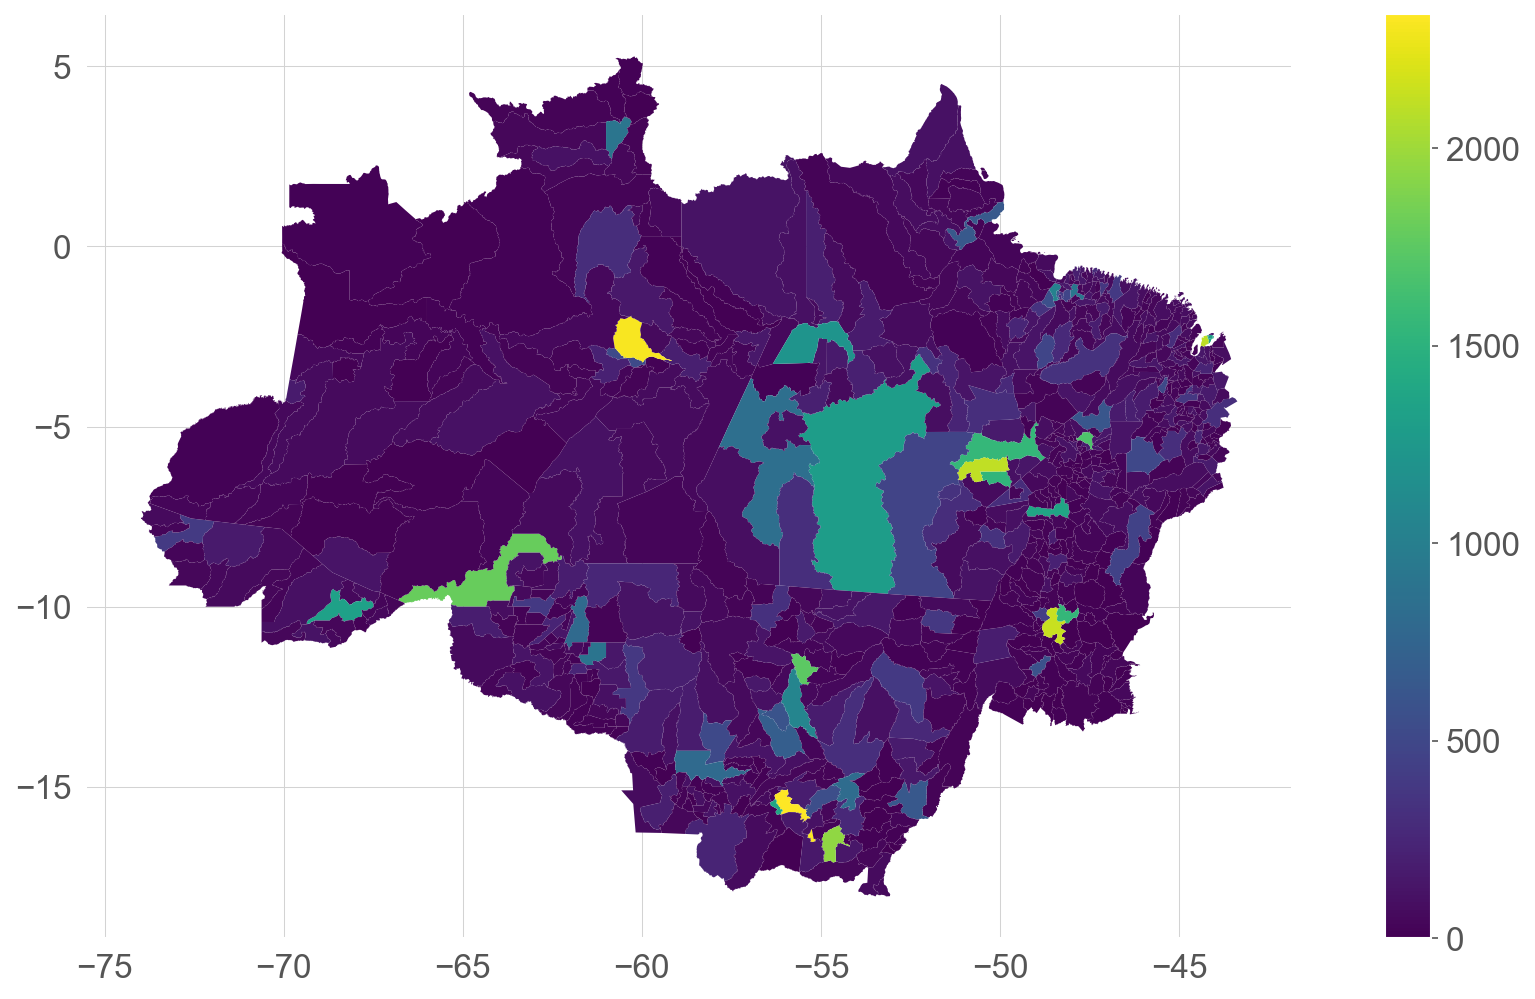

In [11]:
gdf_urb.plot(column='diff', cmap='viridis', legend=True)